<a href="https://colab.research.google.com/github/asserhasan/machine-learning-/blob/main/dogsdatset_crop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import os
from PIL import Image
import skimage
import skimage.io
from skimage import transform
from skimage.transform import resize
from skimage.color import rgb2gray
from skimage import transform
import cv2
import glob
import xml.etree.ElementTree as ET
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
root_images="/content/drive/MyDrive/image_dataset/images"
root_annots="/content/drive/MyDrive/image_dataset/Annotation"

##cropping images according to boundary boxes

In [ ]:
#this function get the boundary box coordinates
def bounding_box(image ,b):
    bpath = root_annots+str("/"+b+"/"+str(image.split(".")[0]))
    tree = ET.parse(bpath)
    root = tree.getroot()
    objects = root.findall('object')
    for o in objects:
        bndbox = o.find('bndbox') # reading bound box
        xmin = int(bndbox.find('xmin').text)
        ymin = int(bndbox.find('ymin').text)
        xmax = int(bndbox.find('xmax').text)
        ymax = int(bndbox.find('ymax').text)

    return (xmin,ymin,xmax,ymax)

In [ ]:
total_images = []
total_labels = []
breeds = []
image_file_name = []
for b in (os.listdir(root_images)):
  breeds.append(b)
for b in breeds:
  file_path =  os.path.join(root_images,b)
  for img in(os.listdir(file_path)):
    xmin , ymin ,xmax,ymax = bounding_box(img,b)
    image_file_name.append(os.path.join(root_images,b,img))
    im = cv2.imread(os.path.join(root_images,b,img))
    cropped_img = im[ymin:ymax, xmin:xmax]
    total_images.append(cropped_img)
    total_labels.append(int(b))



In [ ]:
len(total_images)

799

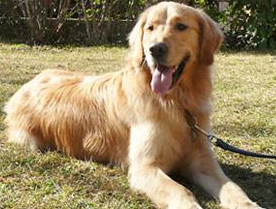

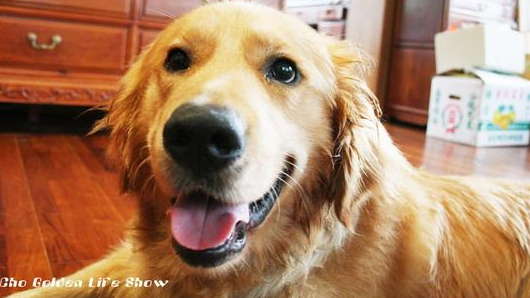

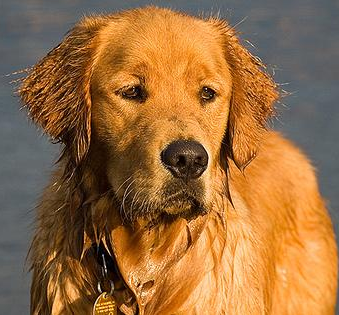

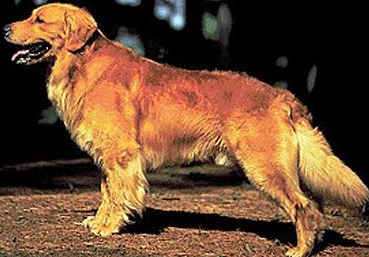

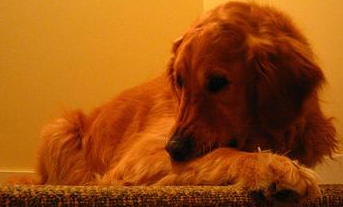

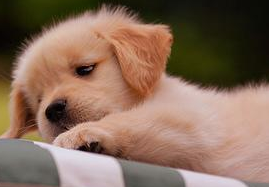

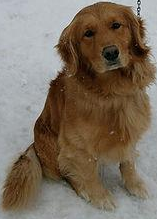

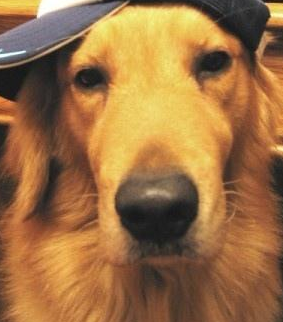

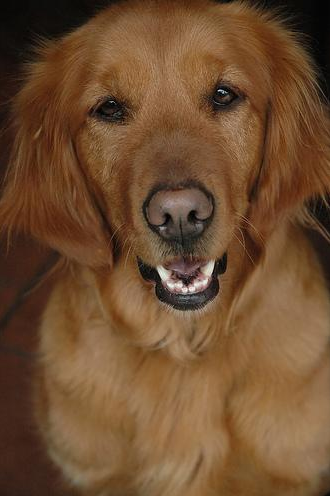

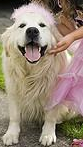

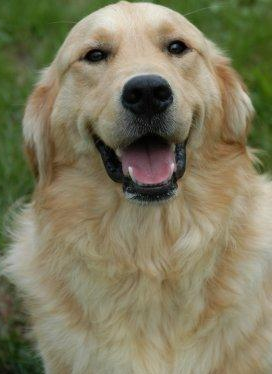

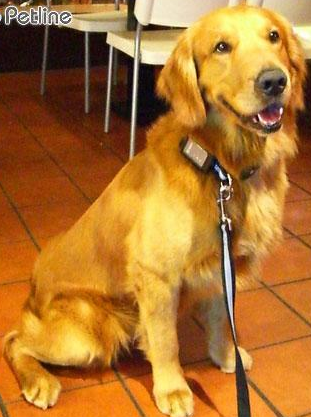

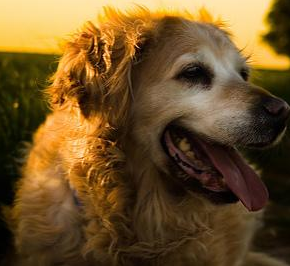

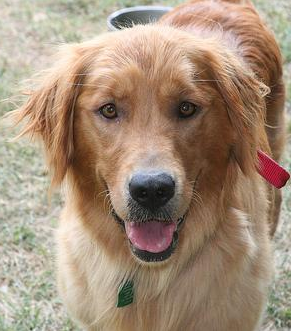

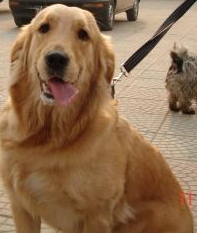

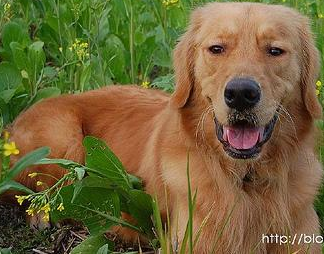

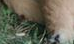

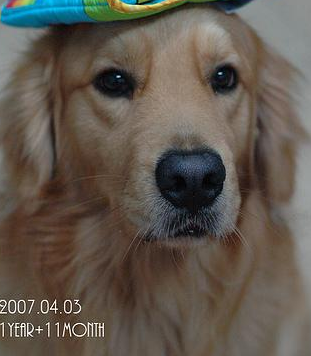

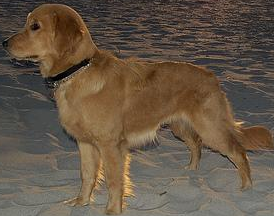

KeyboardInterrupt: ignored

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
for crpimage in total_images:
  cv2_imshow(crpimage)

In [ ]:
print(total_images)

[array([[[ 30,  54,  54],
        [ 14,  40,  40],
        [ 19,  43,  43],
        ...,
        [ 40,  60,  55],
        [ 43,  63,  58],
        [ 38,  58,  53]],

       [[ 46,  67,  68],
        [ 21,  45,  45],
        [ 23,  44,  45],
        ...,
        [ 38,  58,  53],
        [ 39,  59,  54],
        [ 29,  49,  44]],

       [[100, 120, 121],
        [ 22,  43,  44],
        [ 23,  43,  44],
        ...,
        [ 31,  51,  46],
        [ 37,  57,  52],
        [ 36,  56,  51]],

       ...,

       [[104, 145, 154],
        [173, 214, 223],
        [126, 167, 176],
        ...,
        [ 53,  64,  61],
        [ 45,  56,  53],
        [ 40,  51,  48]],

       [[ 73, 112, 121],
        [ 88, 127, 136],
        [ 99, 138, 147],
        ...,
        [ 48,  59,  56],
        [ 52,  63,  60],
        [ 51,  62,  59]],

       [[ 98, 134, 142],
        [ 20,  56,  64],
        [ 18,  54,  64],
        ...,
        [ 56,  67,  64],
        [ 57,  68,  65],
        [ 61,  72,  69]

##resizing and flatenning the images

In [ ]:
final_images = []
for image in total_images:
  img_resized = resize(image,(32,32,3))
  final_images.append(img_resized.flatten())




In [ ]:
print(len(final_images))

799


In [ ]:
final_images = np.array(final_images)
final_labels = np.array(total_labels)
print(len(final_images))
print(len(final_labels))

799
799


In [ ]:
x_train , x_test , y_train , y_test = train_test_split(final_images , final_labels ,test_size = 0.33, random_state=12)

In [ ]:
# initializing the model and train it
model = LogisticRegression(C= 0.1 ,penalty = 'l2',solver='liblinear', max_iter=1000)

History = model.fit(x_train,y_train)

In [ ]:
y_predict = model.predict(x_test)
print(model.n_iter_)

[11 11 11 11 11]


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_predict, y_test)


0.5378787878787878

In [ ]:
print(np.unique(final_labels))

[1 2 3 4 5]
